In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predicting bycycle traffic across Seattle's Fremont bridge

In [3]:
fremont = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [4]:
# compute daily traffic
fremont = fremont.resample('d').sum()
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03,3521.0,1760.0,1761.0
2012-10-04,3475.0,1708.0,1767.0
2012-10-05,3148.0,1558.0,1590.0
2012-10-06,2006.0,1080.0,926.0
2012-10-07,2142.0,1191.0,951.0
...,...,...,...
2022-09-26,3187.0,1218.0,1969.0
2022-09-27,3672.0,1383.0,2289.0
2022-09-28,2906.0,1061.0,1845.0


<AxesSubplot:xlabel='Date'>

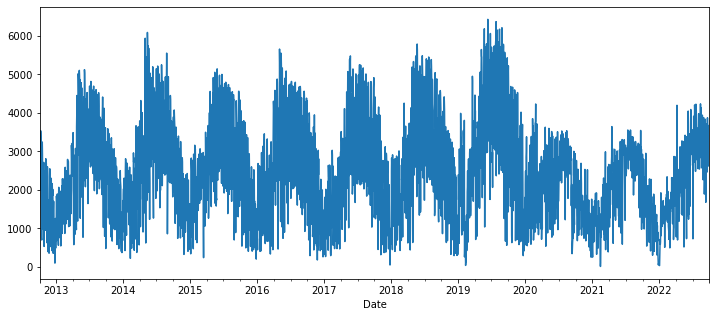

In [5]:
# plot daily traffic
fremont['Fremont Bridge Total'].plot(figsize=(12,5))

In [6]:
# day of the week/month/year/covid
fremont['day_of_week'] = fremont.index.dayofweek
fremont['month'] = fremont.index.month
fremont['year'] = fremont.index.year
fremont['covid'] = 0
fremont.loc['03-01-2020':,'covid'] = 1
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid
Date,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0
...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1


In [7]:
# holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
calendar = USFederalHolidayCalendar()
holidays = calendar.holidays('01-01-2013','09-30-2022')
fremont['holidays'] = pd.Series(1,index=holidays,name='holidays')
fremont.fillna(0,inplace=True)
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid,holidays
Date,,,,,,,,
2012-10-03,3521.0,1760.0,1761.0,2,10,2012,0,0.0
2012-10-04,3475.0,1708.0,1767.0,3,10,2012,0,0.0
2012-10-05,3148.0,1558.0,1590.0,4,10,2012,0,0.0
2012-10-06,2006.0,1080.0,926.0,5,10,2012,0,0.0
2012-10-07,2142.0,1191.0,951.0,6,10,2012,0,0.0
...,...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1,0.0
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1,0.0
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1,0.0


In [10]:
fremont.holidays.value_counts()

0.0    3552
1.0      98
Name: holidays, dtype: int64

In [11]:
# hours of daylight
def get_hoursdaylight(date):
    axis = np.radians(23.44) # tilt of Earth's axis
    latitude = np.radians(47.61) # Seattle's latidude 
    days = (date-pd.to_datetime('2000-12-31')).days
    m = (1 - np.tan(latitude)*np.tan(axis*np.cos(days*2*np.pi/365.25)))
    return 24*np.degrees(np.arccos(1-m))/180
fremont['hours_daylight'] = fremont.index.map(get_hoursdaylight)

In [15]:
fremont['hours_daylight'] = fremont.index.map(get_hoursdaylight)

<AxesSubplot:xlabel='Date'>

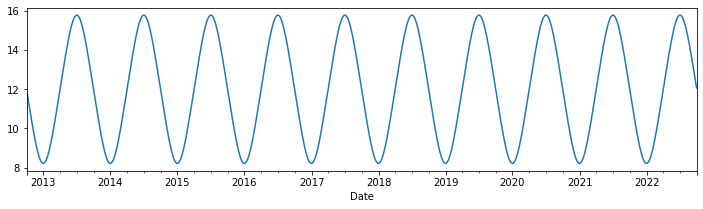

In [17]:
fremont.hours_daylight.plot(figsize=(12,3))

In [18]:
# weather features
weather = pd.read_csv('Seattle_weather.csv',index_col='DATE',parse_dates=True)
# PRCP (precipitation), TAVG (average temperature), SNOW (snowfall), AWND (average wind speed)
weather[['PRCP','TAVG','SNOW','AWND']].isna().sum()

PRCP     3
TAVG    90
SNOW     0
AWND     1
dtype: int64

<AxesSubplot:xlabel='DATE'>

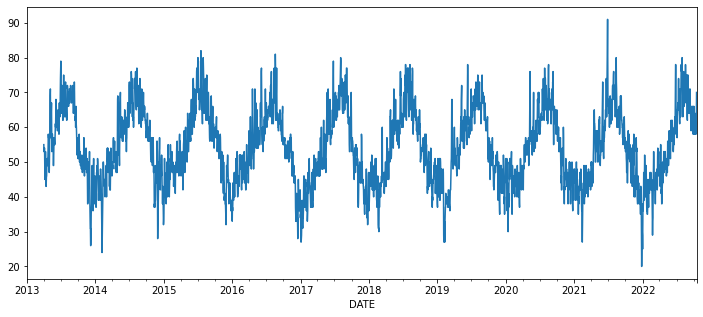

In [19]:
# TAVG column has some missing values 
weather.TAVG.plot(figsize=(12,5))

In [20]:
# fix TAVG column
weather.TAVG.fillna(0.5*(weather.TMAX+weather.TMIN),inplace=True)

<AxesSubplot:xlabel='DATE'>

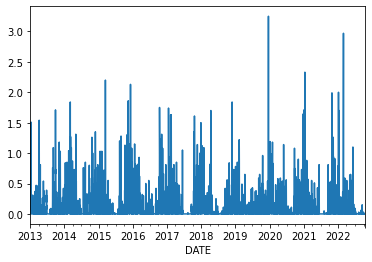

In [22]:
# plot precipitation data
weather.PRCP.plot()

<AxesSubplot:xlabel='DATE'>

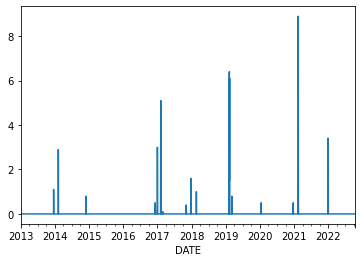

In [23]:
# plot snowfall data
weather.SNOW.plot()

<AxesSubplot:xlabel='DATE'>

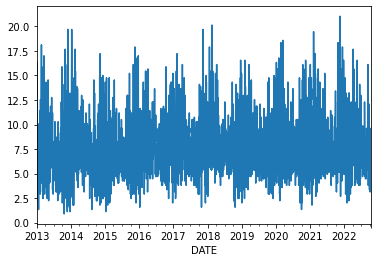

In [24]:
# plot wind data
weather.AWND.plot()

In [25]:
fremont = fremont.join(weather[['PRCP','TAVG','SNOW','AWND']]).loc['2013-01-01':]
fremont

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,day_of_week,month,year,covid,holidays,hours_daylight,PRCP,TAVG,SNOW,AWND
Date,,,,,,,,,,,,,
2013-01-01,678.0,344.0,334.0,1,1,2013,0,1.0,8.219578,0.00,34.0,0.0,6.04
2013-01-02,1835.0,904.0,931.0,2,1,2013,0,0.0,8.221629,0.00,36.5,0.0,7.16
2013-01-03,1803.0,890.0,913.0,3,1,2013,0,0.0,8.225045,0.16,36.5,0.0,6.71
2013-01-04,1712.0,836.0,876.0,4,1,2013,0,0.0,8.229824,0.10,43.0,0.0,6.26
2013-01-05,719.0,403.0,316.0,5,1,2013,0,0.0,8.235960,0.12,42.0,0.0,6.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,3187.0,1218.0,1969.0,0,9,2022,1,0.0,12.305350,0.00,66.0,0.0,3.36
2022-09-27,3672.0,1383.0,2289.0,1,9,2022,1,0.0,12.246540,0.00,66.0,0.0,5.82
2022-09-28,2906.0,1061.0,1845.0,2,9,2022,1,0.0,12.187697,0.03,58.0,0.0,5.37


In [27]:
# add air quality index
aqi = pd.read_csv('Seattle_air_quality_index.csv',index_col='Date',parse_dates=True)
fremont['aqi'] = aqi

In [28]:
# fix aqi missing values
fremont.fillna(method='ffill',inplace=True)

In [29]:
# 2013-2020
fremont2013_2020 = fremont[fremont.index.year<2021].copy()
# 2020-2022
fremont2021_2022 = fremont[fremont.index.year>=2021].copy()

In [30]:
# target vector / feature matrix
y2013_2020 = fremont2013_2020['Fremont Bridge Total']
X2013_2020 = fremont2013_2020[['day_of_week','covid','holidays','hours_daylight','PRCP','TAVG','SNOW','AWND','year','aqi']]

## Linear Regression

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures

In [170]:
# regression pipeline

num_features = ['hours_daylight','PRCP','TAVG','SNOW','AWND','year','aqi']
cat_features = ['day_of_week','covid','holidays']


feature_processor = ColumnTransformer(transformers=[
    ('encoder',OneHotEncoder(),cat_features),
],remainder='passthrough')

pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features',PolynomialFeatures(degree=1,add_bias=False)),
    ('regression',LinearRegression())
])

In [171]:
pipe.fit(X2013_2020,y2013_2020)
fremont2013_2020['predicted'] = pipe.predict(X2013_2020)

<AxesSubplot:xlabel='Date'>

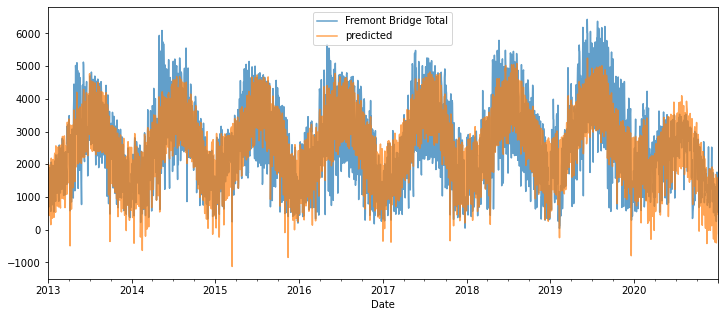

In [172]:
# daily traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].plot(figsize=(12,5),alpha=0.7)

Text(0.5, 1.0, 'daily traffic')

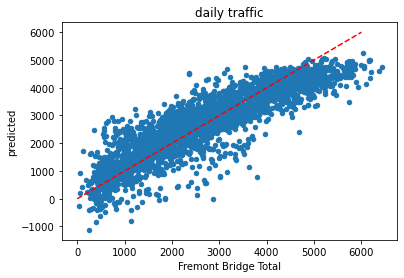

In [177]:
fremont2013_2020.plot.scatter(x='Fremont Bridge Total',y='predicted')
plt.plot([0,6000],[0,6000],'r--')
plt.title('daily traffic')

<AxesSubplot:xlabel='Date'>

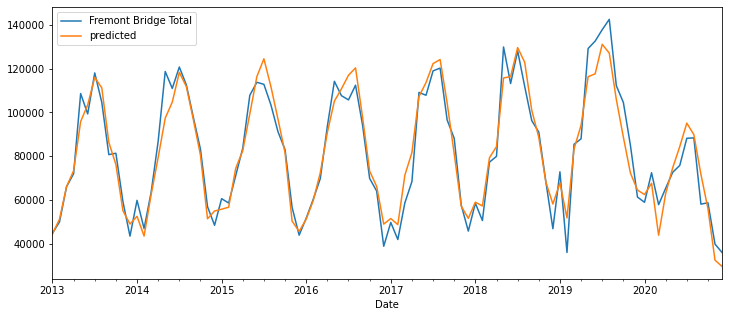

In [175]:
# monthly traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].resample('m').sum().plot(figsize=(12,5))

Text(0.5, 1.0, 'monthly traffic')

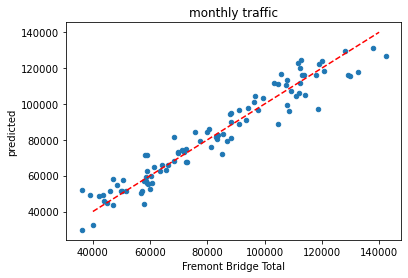

In [180]:
fremont2013_2020.resample('m').sum().plot.scatter(x='Fremont Bridge Total',y='predicted')
plt.plot([40_000,140_000],[40_000,140_000],'r--')
plt.title('monthly traffic')

<AxesSubplot:xlabel='Date'>

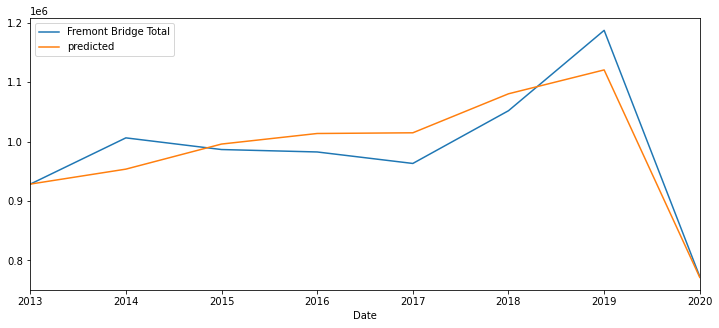

In [176]:
# yearly traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].resample('y').sum().plot(figsize=(12,5))

## Data Science Fiction: 2021-2022 without COVID

In [181]:
# set covid feature to zero
fremont2021_2022.covid = 0

In [182]:
X2021_2022 = fremont2021_2022[['day_of_week','covid','holidays',
                              'hours_daylight','year','PRCP','TAVG','SNOW','AWND','aqi']]
y2021_2022 = fremont2021_2022['Fremont Bridge Total']

In [183]:
fremont2021_2022['prediction'] = pipe.predict(X2021_2022)

<AxesSubplot:xlabel='Date'>

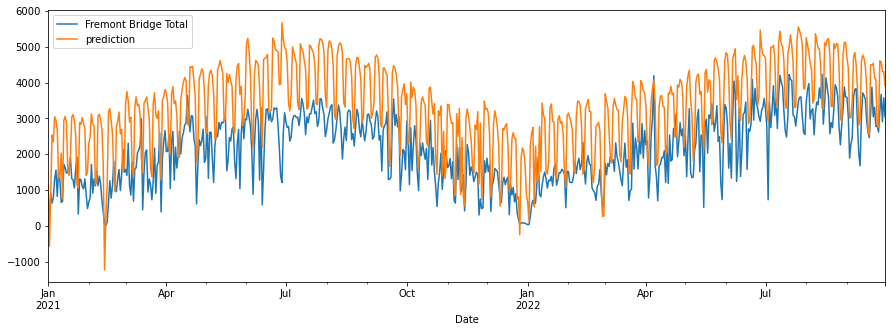

In [184]:
fremont2021_2022[['Fremont Bridge Total','prediction']].plot(figsize=(15,5))

## Regularization + GridSearch

In [186]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler

In [191]:
# regression pipeline
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('scaler', MinMaxScaler()),
    ('poly_features',PolynomialFeatures(degree=1)),
    ('regressor',Ridge()) #  Rige, Lasso or LinearRegression
])

In [192]:
param_dic = {'poly_features__degree':[1,2],
             'regressor__alpha':[1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000]}

In [193]:
grid = GridSearchCV(pipe,
             param_dic,
             scoring='neg_mean_squared_error' ,
             cv=10,
             n_jobs=-1,
             verbose=1)

In [194]:
grid.fit(X2013_2020,y2013_2020)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('encoder',
                                                                         OneHotEncoder(),
                                                                         ['day_of_week',
                                                                          'covid',
                                                                          'holidays'])])),
                                       ('scaler', MinMaxScaler()),
                                       ('poly_features',
                                        PolynomialFeatures(degree=1)),
                                       ('regressor', Ridge())]),
             n_jobs=-1,
             param_grid={'poly_features__degree': [1, 2],
                         'regressor__alpha': [1e-05, 0.00

In [195]:
grid.best_params_

{'poly_features__degree': 2, 'regressor__alpha': 1}

In [196]:
best_pipe = grid.best_estimator_

In [197]:
fremont2013_2020['prediction'] = best_pipe.predict(X2013_2020)

<AxesSubplot:xlabel='Date'>

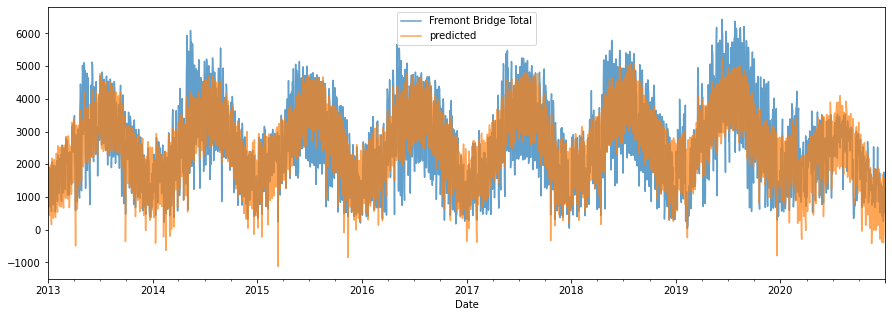

In [198]:
# daily traffic: actual and predicted
fremont2013_2020[['Fremont Bridge Total','predicted']].plot(figsize=(15,5),alpha=0.7)

Text(0.5, 1.0, 'daily traffic')

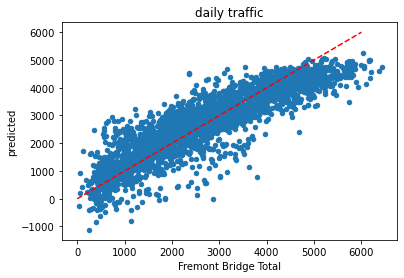

In [199]:
fremont2013_2020.plot.scatter(x='Fremont Bridge Total',y='predicted')
plt.plot([0,6000],[0,6000],'r--')
plt.title('daily traffic')

## Model's coefficients (no polynomial features)

In [200]:
# pipeline
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
    ('regressor', LinearRegression()) # or Ridge or Lasso
])
pipe.fit(X2013_2020,y2013_2020)

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['day_of_week', 'covid',
                                                   'holidays'])])),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('regressor', LinearRegression())])

In [201]:
cat_features

['day_of_week', 'covid', 'holidays']

In [202]:
# encoded feature names
encoded_feature_names = pipe['feature_processor'].named_transformers_['encoder'].get_feature_names_out(cat_features)
list(encoded_feature_names)

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'covid_0',
 'covid_1',
 'holidays_0.0',
 'holidays_1.0']

In [203]:
feature_names = list(encoded_feature_names)+num_features
feature_names

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'covid_0',
 'covid_1',
 'holidays_0.0',
 'holidays_1.0',
 'hours_daylight',
 'PRCP',
 'TAVG',
 'SNOW',
 'AWND',
 'year',
 'aqi']

In [204]:
# coefficients
coefficients = pipe['regressor'].coef_
coefficients

array([  509.82195061,   605.17425001,   576.5452816 ,   442.37212045,
         156.33710933, -1113.0656564 , -1177.1850556 ,   615.12450051,
        -615.12450051,   585.44324271,  -585.44324271,   132.51135678,
       -1083.84696093,    39.7316392 ,  -139.83756828,   -41.56299798,
          95.20705219,    -2.92950857])

In [205]:
len(coefficients)

18

In [206]:
len(feature_names)

18

In [207]:
# put coefficients into a dataframe
coeff_df = pd.DataFrame(data=coefficients,index=feature_names,columns=['coefficient'])
coeff_df

,coefficient
day_of_week_0,509.821951
day_of_week_1,605.174250
day_of_week_2,576.545282
day_of_week_3,442.372120
day_of_week_4,156.337109
day_of_week_5,-1113.065656
day_of_week_6,-1177.185056
covid_0,615.124501
covid_1,-615.124501
holidays_0.0,585.443243


<AxesSubplot:>

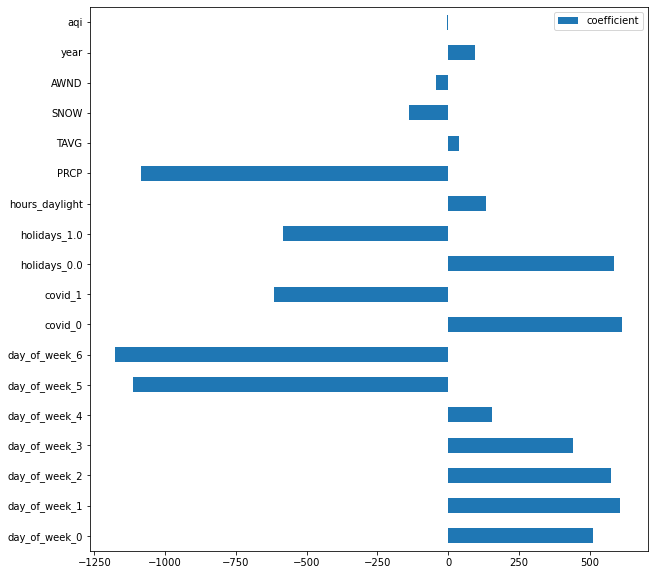

In [210]:
coeff_df.plot.barh(figsize=(10,10))

## Model's coefficients (no polynomial features)

In [158]:
# pipeline
pipe = Pipeline(steps=[
    ('feature_processor',feature_processor),
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('regressor', Ridge(alpha=1)) # Ridge, Lasso or Linear Regression
])
pipe.fit(X2013_2020,y2013_2020)

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['day_of_week', 'covid',
                                                   'holidays'])])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('regressor', Ridge(alpha=1))])

In [159]:
poly_feature_names = pipe['poly_features'].get_feature_names_out(feature_names)
list(poly_feature_names)

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'covid_0',
 'covid_1',
 'holidays_0.0',
 'holidays_1.0',
 'hours_daylight',
 'PRCP',
 'TAVG',
 'SNOW',
 'AWND',
 'year',
 'aqi',
 'day_of_week_0^2',
 'day_of_week_0 day_of_week_1',
 'day_of_week_0 day_of_week_2',
 'day_of_week_0 day_of_week_3',
 'day_of_week_0 day_of_week_4',
 'day_of_week_0 day_of_week_5',
 'day_of_week_0 day_of_week_6',
 'day_of_week_0 covid_0',
 'day_of_week_0 covid_1',
 'day_of_week_0 holidays_0.0',
 'day_of_week_0 holidays_1.0',
 'day_of_week_0 hours_daylight',
 'day_of_week_0 PRCP',
 'day_of_week_0 TAVG',
 'day_of_week_0 SNOW',
 'day_of_week_0 AWND',
 'day_of_week_0 year',
 'day_of_week_0 aqi',
 'day_of_week_1^2',
 'day_of_week_1 day_of_week_2',
 'day_of_week_1 day_of_week_3',
 'day_of_week_1 day_of_week_4',
 'day_of_week_1 day_of_week_5',
 'day_of_week_1 day_of_week_6',
 'day_of_week_1 covid_0',
 'day_of_week_1 covid_1',
 'day_of_week_1 

In [160]:
len(poly_feature_names)

189

In [161]:
coefficients = pipe['regressor'].coef_
len(coefficients)

189

In [162]:
coeff_df = pd.DataFrame(data=coefficients, index=poly_feature_names, columns=['coefficient'])
coeff_df

,coefficient
day_of_week_0,-26.984914
day_of_week_1,-30.136949
day_of_week_2,-18.136718
day_of_week_3,-20.899646
day_of_week_4,-6.482666
...,...
AWND year,-0.088613
AWND aqi,-0.382546
year^2,0.122588
year aqi,0.395775


In [163]:
sorted_coeff_df = coeff_df.sort_values(by='coefficient', ascending=False)
sorted_coeff_df

,coefficient
day_of_week_6 covid_1,787.587924
day_of_week_5 covid_1,666.817293
PRCP^2,528.401344
day_of_week_6 SNOW,385.794576
day_of_week_5 PRCP,348.161280
...,...
holidays_1.0 TAVG,-510.199501
covid_1 TAVG,-516.210502
day_of_week_5 covid_0,-620.167617
day_of_week_6 covid_0,-731.596707


<AxesSubplot:>

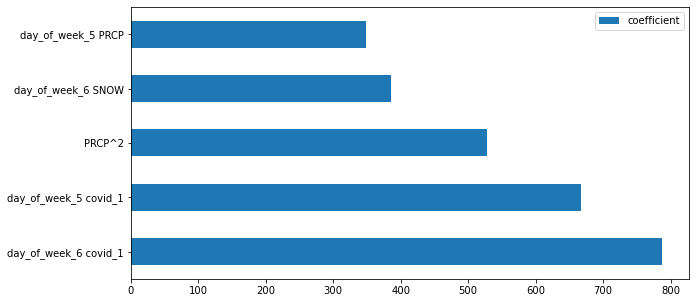

In [167]:
# top 5 positive coefficients
sorted_coeff_df.head(5).plot.barh(figsize=(10,5))

<AxesSubplot:>

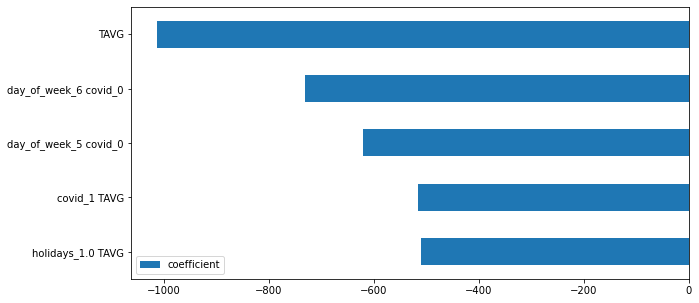

In [168]:
# top 5 negative coefficients
sorted_coeff_df.tail(5).plot.barh(figsize=(10,5))